In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data_file="customer_churn_data.csv"
df=pd.read_csv(data_file)

In [ ]:
print("\nMissing values:\n",df.isnull().sum())
df=df.dropna()



Missing values:
 customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64


Summary Statistics

In [ ]:
print("\nSummary Statistics(Numerical):\n",df.describe())
print("\n Summary Statistics (Categorical):\n",df.select_dtypes(include=['object']).describe())


Summary Statistics(Numerical):
                 age  senior_citizen        tenure  monthly_charges  \
count  10000.000000    10000.000000  10000.000000     10000.000000   
mean      44.662500        0.092300     22.216800        53.640204   
std       14.397976        0.289463     19.963232        17.047669   
min       18.000000        0.000000      1.000000        20.050000   
25%       34.000000        0.000000      6.000000        40.407500   
50%       44.000000        0.000000     16.000000        51.770000   
75%       55.000000        0.000000     33.000000        66.280000   
max       80.000000        1.000000     72.000000       111.810000   

       total_charges  customer_satisfaction  support_calls  
count   10000.000000           10000.000000   10000.000000  
mean     1192.146321               3.399300       2.007400  
std      1193.960345               1.069193       1.415184  
min        20.320000               1.000000       0.000000  
25%       306.305000           

Exploratory Data Analysis

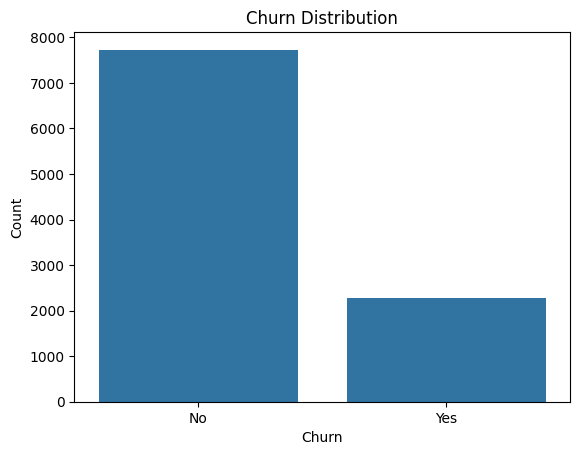


Churn Rate(%):
 churn
No     77.28
Yes    22.72
Name: proportion, dtype: float64


In [ ]:
#Churn Distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#Churn rate
churn_rate=df['churn'].value_counts(normalize=True) * 100
print("\nChurn Rate(%):\n",churn_rate)

Demographic pattern and service usage impact on churn


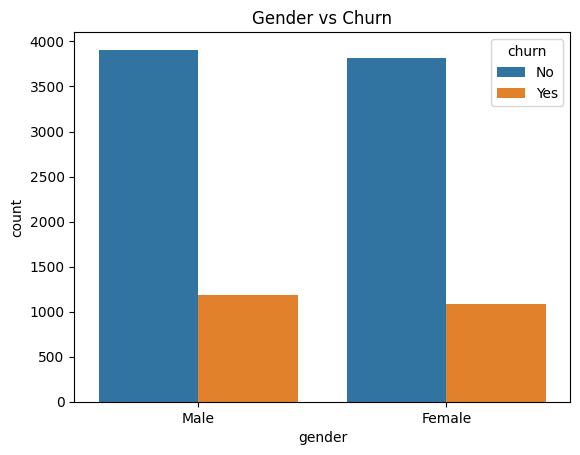

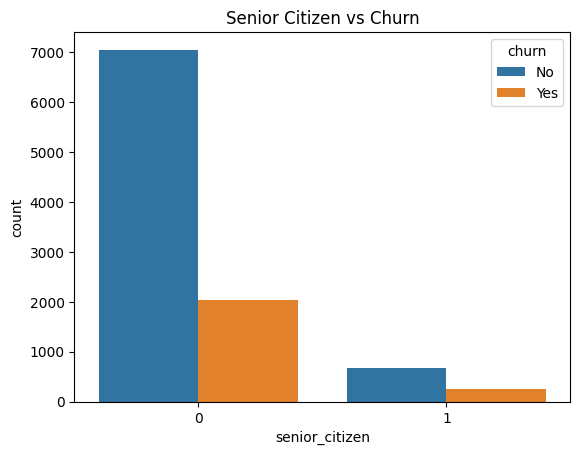

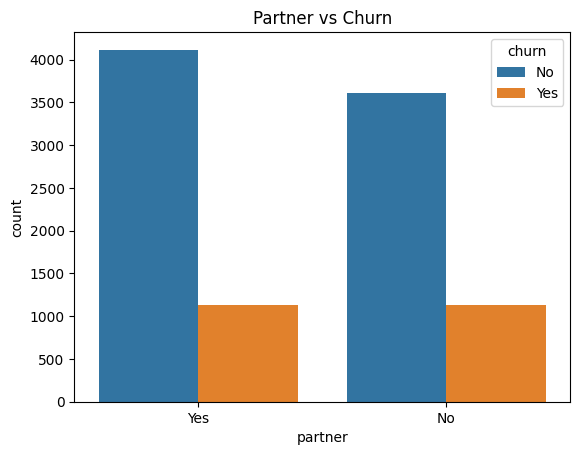

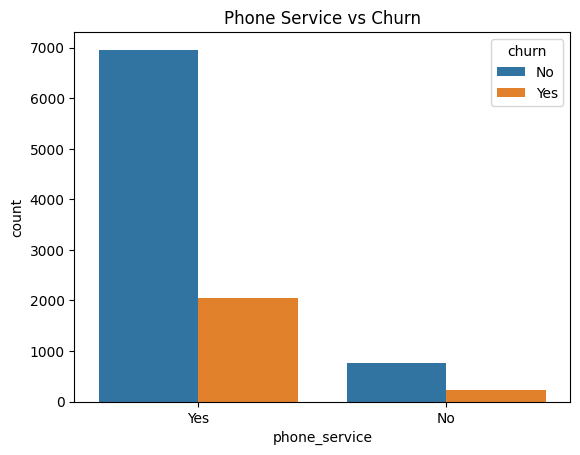

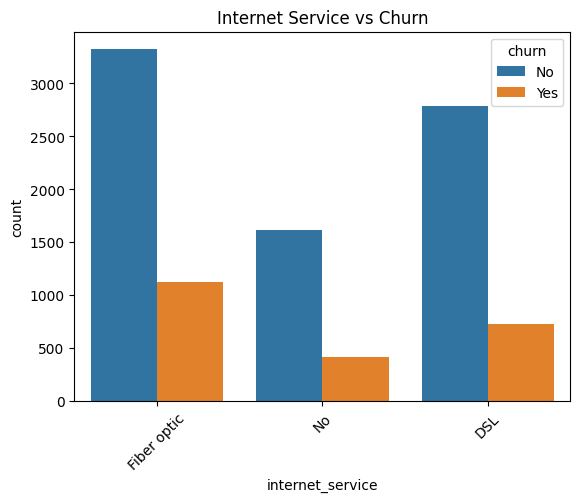

In [ ]:
#Gender vs Churn
sns.countplot(data=df, x='gender', hue='churn')
plt.title("Gender vs Churn")
plt.show()

# Senior Citizen vs Churn
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title("Senior Citizen vs Churn")
plt.show()

# Partner vs Churn
sns.countplot(data=df, x='partner', hue='churn')
plt.title("Partner vs Churn")
plt.show()

#Phone Service vs Churn
sns.countplot(data=df, x='phone_service', hue='churn')
plt.title("Phone Service vs Churn")
plt.show()

# Internet Service vs Churn
sns.countplot(data=df, x='internet_service', hue='churn')
plt.title("Internet Service vs Churn")
plt.xticks(rotation=45)
plt.show()



Financial factors and payment method impacts

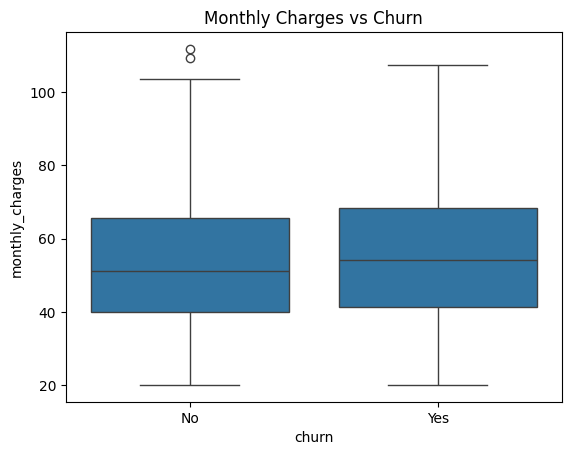

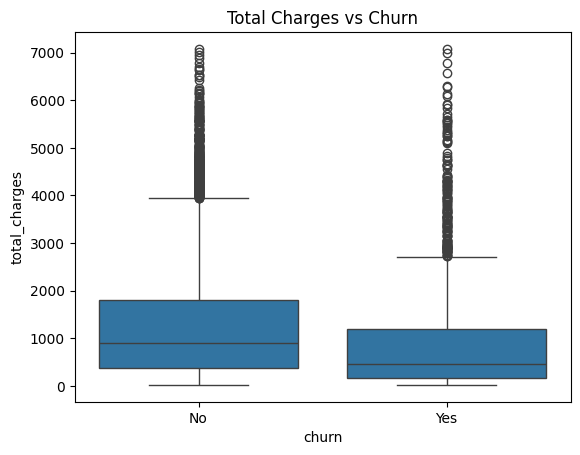

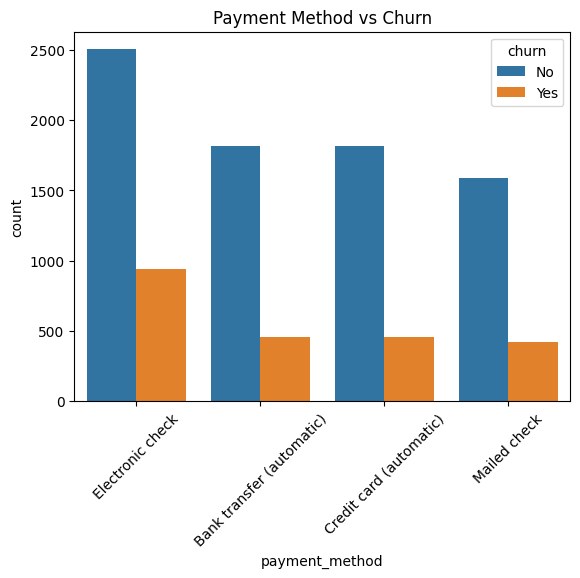

In [ ]:
# Monthly Charges vs Churn
sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title("Monthly Charges vs Churn")
plt.show()

# Convert TotalCharges to numeric if needed
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df.dropna(subset=['total_charges'], inplace=True)

sns.boxplot(data=df, x='churn', y='total_charges')
plt.title("Total Charges vs Churn")
plt.show()

# Payment Method vs Churn
sns.countplot(data=df, x='payment_method', hue='churn')
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing

In [ ]:
# 1. Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# 2. Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']  # Churn is now 0 or 1

# 3. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8000, 23)
X_test shape: (2000, 23)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# -------------------
# Logistic Regression
# -------------------
log_reg_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
log_reg = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=3, n_jobs=-1, scoring='accuracy')
log_reg.fit(X_train, y_train)
print("Best Logistic Regression Params:", log_reg.best_params_)

# -------------------
# Decision Tree
# -------------------
dt_params = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, n_jobs=-1, scoring='accuracy')
dt.fit(X_train, y_train)
print("Best Decision Tree Params:", dt.best_params_)

# -------------------
# Random Forest
# -------------------
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, scoring='accuracy')
rf.fit(X_train, y_train)
print("Best Random Forest Params:", rf.best_params_)

# -------------------
# SVM
# -------------------
svm_params = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=3, n_jobs=-1, scoring='accuracy')
svm.fit(X_train, y_train)
print("Best SVM Params:", svm.best_params_)


Best Logistic Regression Params: {'C': 10, 'solver': 'lbfgs'}
Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Random Forest Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


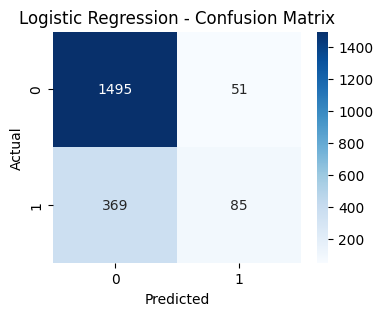

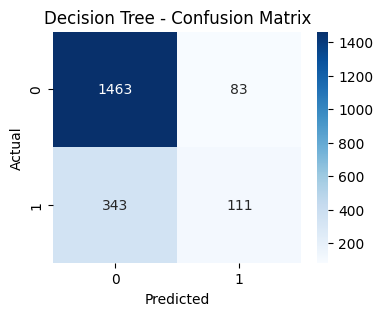

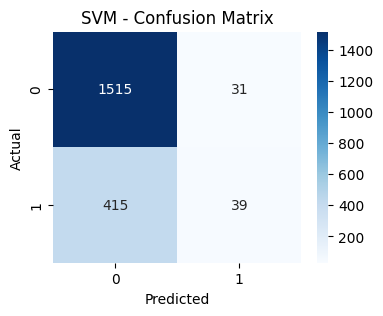


Model Comparison:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.7900   0.625000  0.187225  0.288136
1        Decision Tree    0.7870   0.572165  0.244493  0.342593
2        Random Forest    0.7905   0.640000  0.176211  0.276339
3                  SVM    0.7770   0.557143  0.085903  0.148855

✅ Best Model: Decision Tree


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store results
results = []

# Dictionary of best models from Task 4
best_models = {
    "Logistic Regression": log_reg.best_estimator_,
    "Decision Tree": dt.best_estimator_,
    "Random Forest": rf.best_estimator_,
    "SVM": svm.best_estimator_
}

# Evaluate each model
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare all models in a table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Comparison:\n")
print(results_df)

# Select the best model based on F1-Score
best_model_name = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]["Model"]
print(f"\n✅ Best Model: {best_model_name}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models with basic hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
SVM trained successfully.
